# Computational Methods in Stochastics - Assignment 7

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

### a)

We know that

$U(q) = \lambda e^{-\lambda q} = - \log[e^{-\lambda q}] = - \log\{\exp[-\lambda q + \log(\lambda)] = \lambda q - \log{\lambda}$

So we would have:

$\Rightarrow \forall q \nabla U = dU(q)/dq = \lambda$

### b)
Functions needed in the HMC Algorithm:
- **Exponential Function**: $Exp(x,l) = l \times e^{-l\times x}$
- **Potential Energy Function**: $U(q) = - log \lambda + \lambda q$
- **Energy Function**: $H(q,p) = K(p) + U(q)$
- **Derivative of Potential Energy Function**: $\frac{d}{dq}[U(q)] = \lambda$

In [11]:
Lambda = 2 
N = 1000000 
L = 25 
BINS = 50 

def Exponential(x, l):
    return l*np.exp(-l*x)

def U(q):
    return -np.log(Exponential(q, Lambda))

def grad_U(q):
    return Lambda

### c and d)

100%|██████████| 1000000/1000000 [00:17<00:00, 56073.49it/s]


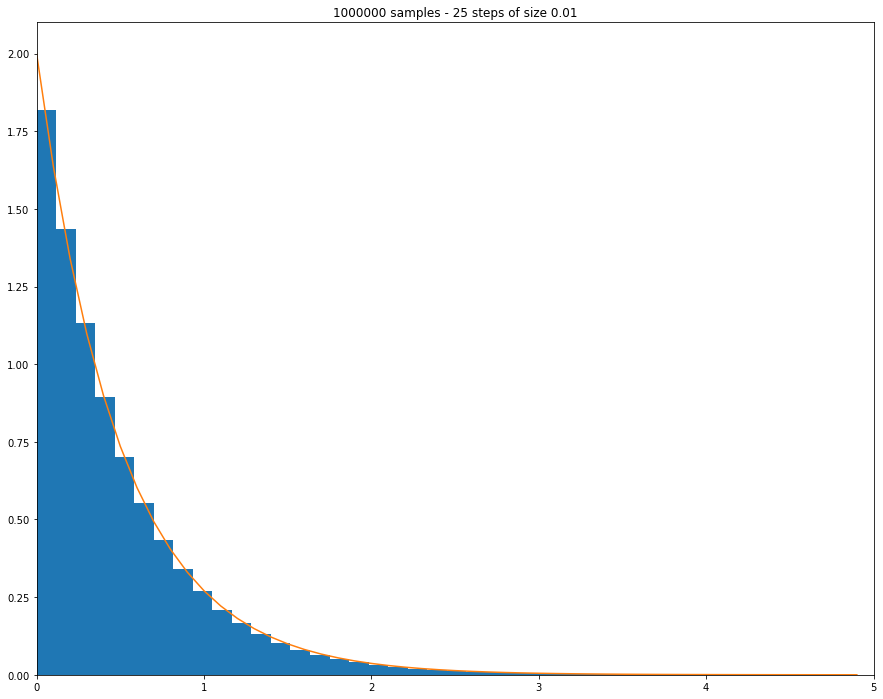

In [12]:
EPSILON = 0.01
q0 = np.random.random()
samples = []

def Update_p_q(q, p):
    for i in range(L):
        g = grad_U(q)
        p = p - EPSILON * g / 2
        q = q + EPSILON * p    
        if q < 0:
            q = -q
            p = -p
        p = p - EPSILON * g / 2
    p = -p
    return q, p

def Calc_p(p, q):
    return p - EPSILON * grad_U(q)/2

def U_computations(q0, q1):
    return U(q0), U(q1), U(q0) - U(q1)

def K_computations(p1, p0):
    return p1**2/2, p0**2/2, p1**2/2 - p0**2/2

for i in tqdm(range(N)):
    q1 = q0
    p0 = np.random.normal()
    p1 = p0
    p0 = Calc_p(p0, q1)
    q1, p0 = Update_p_q(q1, p0)  
    U_current, U_prop, diff_U  = U_computations(q0, q1)
    K_current, K_prop, diff_K = K_computations(p1, p0)

    if (np.random.random() < np.exp(diff_U + diff_K)): # constraint 1
        q0 = q1
    samples.append(q0)

plt.figure(figsize=(15, 12))
plt.hist(samples, density=True, bins=BINS)
plt.plot(np.arange(0,5,0.1), Exponential(np.arange(0,5,0.1), Lambda))
plt.xlim(0,5)
plt.title(str(N)+" samples - " + str(L) + " steps of size " + str(EPSILON))
plt.show()